In [1]:
from datasets import load_dataset
from PIL import Image
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

train_csv = './dataset/data/cifar100_nl.csv'
test_csv = './dataset/data/cifar100_nl_test.csv'

dataset = load_dataset('csv', data_files=train_csv, split='train')
test_dataset = load_dataset('csv', data_files=test_csv, split='train')

print(test_dataset)
test_dataset = test_dataset.rename_column('filename', "img")
test_dataset = test_dataset.rename_column('class', "label")
dataset = dataset.rename_column('filename', "img")
dataset = dataset.rename_column('class', "label")

labels = pd.Series(dataset['label'])
label_list = list(labels.loc[~labels.isna()].unique())
label_list.sort()
onehotencoder = {}
onehotdecoder = {}

for i, label in enumerate(label_list):
    onehotencoder[label] = i
    onehotdecoder[i] = label
    
print(label_list)
print('none :', pd.Series(dataset['label']).isna().sum())

unlabeled_dataset = dataset.filter(lambda data: data['label'] is None)
dataset = dataset.filter(lambda data: data['label'] is not None)


##############TODO############# unlabeled_dataset #################




#print(dataset.features)
def change_path(data):
    data['source'] = './dataset/' + data['img']
    data['img'] = np.array(Image.open('./dataset/' + data['img']))
    if data['label'] is not None:
        data['label'] = onehotencoder[data['label']]

    return data

dataset = dataset.map(change_path)
test_dataset = test_dataset.map(change_path)
unlabeled_dataset = unlabeled_dataset.map(change_path)
dataset.save_to_disk('preprocessed_dataset')
test_dataset.save_to_disk('preprocessed_test_dataset')
unlabeled_dataset.save_to_disk('preprocessed_unlabeled_dataset')

#dataset = dataset.cast_column('img', Image())
#print(dataset['img'][0])

dataset

c:\Users\CafeAlle\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 59998 examples [00:00, 964959.47 examples/s]
Generating train split: 9999 examples [00:00, 2492798.72 examples/s]


Dataset({
    features: ['filename', 'class'],
    num_rows: 9999
})
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'tr

Saving the dataset (1/1 shards): 100%|██████████| 9999/9999 [00:00<00:00, 321387.70 examples/s]


Dataset({
    features: ['img', 'label', 'source'],
    num_rows: 49999
})

(2, 32, 32, 3)
snake


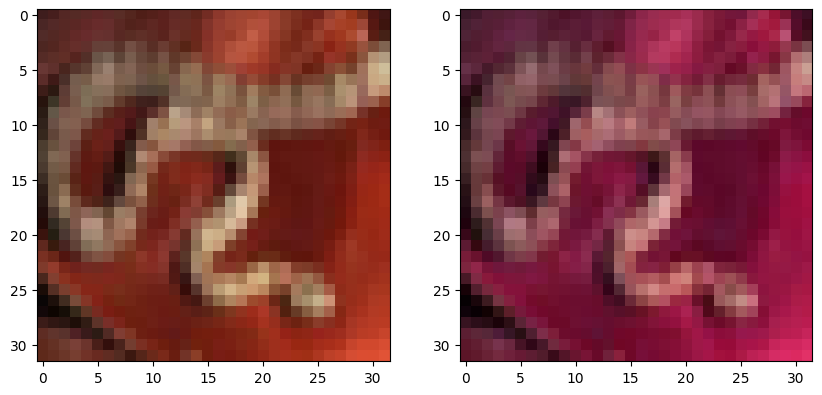

In [5]:
from torchvision.transforms import transforms
from util import *
from datasets import load_from_disk
import matplotlib.pyplot as plt
from PIL import Image

    
dataset = load_from_disk('./preprocessed_dataset')

test_idx = 100
test_data = [dataset[test_idx]['img'], dataset[test_idx+1]['img']]

plt.figure(figsize=(10, 20))
plt.subplot(121)
print(np.array(test_data).shape)
plt.imshow(np2img(test_data)[0])
plt.subplot(122)
print(onehotdecoder[dataset[test_idx]['label']])
plt.imshow(np2img(transform_img(test_data[0])))

    


worm
tiger
clock
possum
palm_tree
couch
orchid
elephant
bridge
bus


Dataset({
    features: ['img', 'label'],
    num_rows: 49999
})

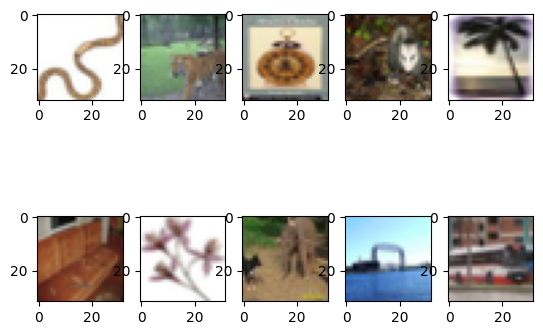

In [13]:
start = 10
end = 20
for i in range(start, end):
    plt.subplot(2, 5, i-start+1)
    plt.imshow(np2img(dataset[i]['img']))
    print(onehotdecoder[dataset[i]['label']])

In [10]:
onehotencoder

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [9]:
from util import *
from datasets import load_from_disk
from ultralytics import YOLO

yolo_path = 'runs/classify/train/weights/best.pt'
#yolo_state = torch.load(yolo_path)
#yolo = yolo_state['model'].to(torch.float32).to(device)
test_dataset = load_from_disk('./preprocessed_test_dataset')
valid_dataloader = DataLoader(test_dataset, batch_size=1)

yolo = YOLO(yolo_path)

#wrong_probs, correct_probs = print_accuracy(yolo, valid_dataloader, is_YOLO=True)
for _, label, src in valid_dataloader:
    pred = yolo.predict(src, verbose = False)
    top1 = list(map(lambda x: onehotdecoder[x.probs.top1], pred))
    top1_prob = list(map(lambda x: x.probs.data , pred))
    print(top1)
    print(top1_prob)
    for l in label.numpy():
        print(onehotdecoder[l])
    break


['leopard']
[tensor([1.9112e-03, 1.8988e-03, 2.3522e-03, 1.4495e-03, 1.3586e-03, 1.3716e-04, 5.5906e-04, 2.4034e-04, 7.7309e-05, 2.7829e-04, 8.5001e-04, 2.4820e-04, 2.9086e-04, 4.5682e-05, 4.3757e-04, 7.1515e-05, 5.0115e-04, 9.4817e-05, 6.0109e-04, 3.4488e-03, 3.6711e-04, 1.7584e-04, 2.5078e-04, 3.0305e-03, 2.7977e-03, 1.0271e-03,
        1.5511e-04, 7.6053e-04, 3.6385e-04, 1.9152e-03, 3.5631e-04, 7.8884e-04, 1.1272e-04, 1.9232e-01, 1.2186e-03, 1.5179e-03, 4.4854e-04, 6.6430e-04, 9.6530e-05, 4.8808e-03, 1.2386e-01, 2.6890e-04, 2.6382e-01, 8.4741e-05, 1.1135e-02, 1.0103e-03, 6.1932e-03, 1.3395e-01, 9.2955e-05, 4.0007e-04, 9.1829e-05, 3.4448e-03,
        4.6764e-03, 2.9838e-03, 8.9878e-04, 7.3531e-04, 2.2555e-03, 1.3301e-03, 6.5093e-04, 6.7929e-03, 4.0445e-03, 3.1756e-03, 1.8650e-03, 4.9921e-03, 5.1118e-04, 2.0695e-03, 1.1488e-03, 3.4782e-03, 9.9576e-04, 3.5593e-04, 4.2930e-04, 7.7211e-04, 1.5496e-04, 1.4381e-02, 1.8621e-03, 1.2732e-02, 1.0089e-03, 5.8886e-04,
        6.4756e-04, 2.8177e

cuda
epoch 2


  6%|▋         | 100/1562 [00:43<10:28,  2.33it/s]

loss:  tensor(1.8341, device='cuda:0')


 13%|█▎        | 200/1562 [01:25<09:45,  2.33it/s]

loss:  tensor(1.8116, device='cuda:0')


 19%|█▉        | 300/1562 [02:07<10:00,  2.10it/s]

loss:  tensor(1.8341, device='cuda:0')


 26%|██▌       | 400/1562 [02:49<08:15,  2.35it/s]

loss:  tensor(1.7481, device='cuda:0')


 32%|███▏      | 500/1562 [03:29<07:11,  2.46it/s]

loss:  tensor(1.7989, device='cuda:0')


 38%|███▊      | 600/1562 [04:09<06:33,  2.45it/s]

loss:  tensor(1.9493, device='cuda:0')


 45%|████▍     | 700/1562 [04:48<06:11,  2.32it/s]

loss:  tensor(1.8148, device='cuda:0')


 51%|█████     | 800/1562 [05:30<05:04,  2.50it/s]

loss:  tensor(1.8405, device='cuda:0')


 58%|█████▊    | 900/1562 [06:09<04:26,  2.49it/s]

loss:  tensor(1.8336, device='cuda:0')


 64%|██████▍   | 1000/1562 [06:47<03:47,  2.48it/s]

loss:  tensor(1.8449, device='cuda:0')


 70%|███████   | 1100/1562 [07:27<03:06,  2.48it/s]

loss:  tensor(1.7774, device='cuda:0')


 77%|███████▋  | 1200/1562 [08:09<02:24,  2.51it/s]

loss:  tensor(1.7525, device='cuda:0')


 83%|████████▎ | 1300/1562 [08:48<01:46,  2.46it/s]

loss:  tensor(1.7938, device='cuda:0')


 90%|████████▉ | 1400/1562 [09:26<01:04,  2.50it/s]

loss:  tensor(1.7828, device='cuda:0')


 96%|█████████▌| 1500/1562 [10:05<00:24,  2.49it/s]

loss:  tensor(1.7986, device='cuda:0')


1563it [10:30,  2.48it/s]                          
313it [00:40,  7.78it/s]                         


Accuracy of the network on the 9999 test images: 84 %
tensor(0.4125)
tensor(0.6990)
----best_model updated----
epoch 3


  6%|▋         | 100/1562 [00:43<12:39,  1.93it/s]

loss:  tensor(1.4446, device='cuda:0')


 13%|█▎        | 200/1562 [01:24<09:37,  2.36it/s]

loss:  tensor(1.5153, device='cuda:0')


 19%|█▉        | 300/1562 [02:08<08:59,  2.34it/s]

loss:  tensor(1.3859, device='cuda:0')


 26%|██▌       | 400/1562 [02:48<07:40,  2.52it/s]

loss:  tensor(1.4647, device='cuda:0')


 32%|███▏      | 500/1562 [03:27<07:10,  2.47it/s]

loss:  tensor(1.3637, device='cuda:0')


 38%|███▊      | 600/1562 [04:05<06:25,  2.49it/s]

loss:  tensor(1.4420, device='cuda:0')


 45%|████▍     | 700/1562 [04:44<05:47,  2.48it/s]

loss:  tensor(1.4700, device='cuda:0')


 51%|█████     | 800/1562 [05:23<05:05,  2.50it/s]

loss:  tensor(1.4392, device='cuda:0')


 58%|█████▊    | 900/1562 [06:02<04:24,  2.50it/s]

loss:  tensor(1.4647, device='cuda:0')


 64%|██████▍   | 1000/1562 [06:40<03:44,  2.50it/s]

loss:  tensor(1.4851, device='cuda:0')


 70%|███████   | 1100/1562 [07:19<03:07,  2.46it/s]

loss:  tensor(1.4389, device='cuda:0')


 77%|███████▋  | 1200/1562 [07:58<02:26,  2.48it/s]

loss:  tensor(1.5086, device='cuda:0')


 83%|████████▎ | 1300/1562 [08:36<01:44,  2.50it/s]

loss:  tensor(1.4409, device='cuda:0')


 90%|████████▉ | 1400/1562 [09:15<01:05,  2.49it/s]

loss:  tensor(1.4571, device='cuda:0')


 96%|█████████▌| 1500/1562 [09:54<00:25,  2.47it/s]

loss:  tensor(1.5006, device='cuda:0')


1563it [10:18,  2.53it/s]                          
313it [00:39,  7.88it/s]                         

Accuracy of the network on the 9999 test images: 83 %
tensor(0.4064)
tensor(0.6944)


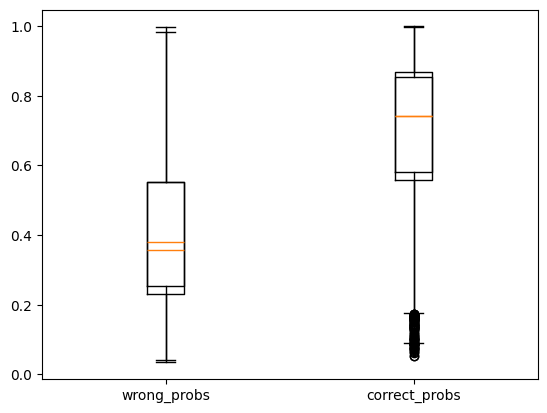

In [2]:
from util import *
from datasets import load_from_disk
import timm



kwargs ={
    'lr' : 0.0001,
    "print_iter_num" : 100,
    "epochs" : 3,
    'batch_size' : 32
}
dataset = load_from_disk('./preprocessed_dataset')
test_dataset = load_from_disk('./preprocessed_test_dataset')
model = timm.create_model("hf_hub:timm/efficientnetv2_rw_m.agc_in1k", pretrained=True)
model = nn.Sequential(nn.UpsamplingNearest2d(size=(224,224)), model)

#model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

print(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
train(model, dataset, test_dataset, **kwargs, load_path="efficient_net.pt", save_path="efficient_net.pt")

In [2]:
import torch
print(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

cuda


In [1]:
valid_dataloader = DataLoader(test_dataset, batch_size=32)

print_accuracy(model, valid_dataloader)

NameError: name 'DataLoader' is not defined

epoch 1


  2%|▏         | 29/1562 [00:11<10:27,  2.44it/s]

loss:  

  2%|▏         | 30/1562 [00:12<12:18,  2.07it/s]

tensor(0.8412, device='cuda:0')


  4%|▍         | 59/1562 [00:24<10:14,  2.45it/s]

loss:  

  4%|▍         | 60/1562 [00:24<11:59,  2.09it/s]

tensor(0.6482, device='cuda:0')


  6%|▌         | 89/1562 [00:36<09:58,  2.46it/s]

loss:  

  6%|▌         | 90/1562 [00:37<11:41,  2.10it/s]

tensor(0.7704, device='cuda:0')


  8%|▊         | 119/1562 [00:49<09:53,  2.43it/s]

loss:  

  8%|▊         | 120/1562 [00:49<11:30,  2.09it/s]

tensor(0.8037, device='cuda:0')


 10%|▉         | 149/1562 [01:01<09:40,  2.43it/s]

loss:  

 10%|▉         | 150/1562 [01:02<11:20,  2.07it/s]

tensor(0.5940, device='cuda:0')


 11%|█▏        | 179/1562 [01:13<09:28,  2.43it/s]

loss:  

 12%|█▏        | 180/1562 [01:14<11:02,  2.08it/s]

tensor(0.7094, device='cuda:0')


 13%|█▎        | 209/1562 [01:26<09:15,  2.43it/s]

loss:  

 13%|█▎        | 210/1562 [01:27<10:49,  2.08it/s]

tensor(0.9059, device='cuda:0')


 15%|█▌        | 239/1562 [01:38<09:08,  2.41it/s]

loss:  

 15%|█▌        | 240/1562 [01:39<10:38,  2.07it/s]

tensor(0.7544, device='cuda:0')


 17%|█▋        | 269/1562 [01:51<08:51,  2.43it/s]

loss:  

 17%|█▋        | 270/1562 [01:51<10:19,  2.09it/s]

tensor(0.7950, device='cuda:0')


 19%|█▉        | 299/1562 [02:03<08:43,  2.41it/s]

loss:  

 19%|█▉        | 300/1562 [02:04<10:04,  2.09it/s]

tensor(0.7449, device='cuda:0')


 21%|██        | 329/1562 [02:19<08:57,  2.30it/s]

loss:  

 21%|██        | 330/1562 [02:19<10:26,  1.97it/s]

tensor(0.8487, device='cuda:0')


 23%|██▎       | 359/1562 [02:34<08:38,  2.32it/s]

loss:  

 23%|██▎       | 360/1562 [02:35<10:09,  1.97it/s]

tensor(0.7397, device='cuda:0')


 25%|██▍       | 389/1562 [02:51<11:09,  1.75it/s]

loss:  

 25%|██▍       | 390/1562 [02:52<13:07,  1.49it/s]

tensor(0.7982, device='cuda:0')


 27%|██▋       | 419/1562 [03:05<08:18,  2.29it/s]

loss:  

 27%|██▋       | 420/1562 [03:06<09:47,  1.94it/s]

tensor(0.8991, device='cuda:0')


 29%|██▊       | 449/1562 [03:19<08:06,  2.29it/s]

loss:  

 29%|██▉       | 450/1562 [03:19<09:27,  1.96it/s]

tensor(0.8695, device='cuda:0')


 31%|███       | 479/1562 [03:32<07:50,  2.30it/s]

loss:  

 31%|███       | 480/1562 [03:32<09:12,  1.96it/s]

tensor(0.7493, device='cuda:0')


 33%|███▎      | 509/1562 [03:45<07:38,  2.30it/s]

loss:  

 33%|███▎      | 510/1562 [03:46<08:55,  1.97it/s]

tensor(0.6538, device='cuda:0')


 35%|███▍      | 539/1562 [03:58<07:23,  2.30it/s]

loss:  

 35%|███▍      | 540/1562 [03:59<08:38,  1.97it/s]

tensor(0.7237, device='cuda:0')


 36%|███▋      | 569/1562 [04:11<07:12,  2.30it/s]

loss:  

 36%|███▋      | 570/1562 [04:12<08:28,  1.95it/s]

tensor(0.8180, device='cuda:0')


 38%|███▊      | 599/1562 [04:24<07:00,  2.29it/s]

loss:  

 38%|███▊      | 600/1562 [04:25<08:10,  1.96it/s]

tensor(0.8449, device='cuda:0')


 40%|████      | 629/1562 [04:37<06:46,  2.30it/s]

loss:  

 40%|████      | 630/1562 [04:38<07:56,  1.96it/s]

tensor(0.8271, device='cuda:0')


 42%|████▏     | 659/1562 [04:51<06:33,  2.29it/s]

loss:  

 42%|████▏     | 660/1562 [04:51<07:40,  1.96it/s]

tensor(0.8307, device='cuda:0')


 44%|████▍     | 689/1562 [05:04<06:17,  2.31it/s]

loss:  

 44%|████▍     | 690/1562 [05:04<07:24,  1.96it/s]

tensor(0.8022, device='cuda:0')


 46%|████▌     | 719/1562 [05:17<06:08,  2.28it/s]

loss:  

 46%|████▌     | 720/1562 [05:18<07:09,  1.96it/s]

tensor(0.7413, device='cuda:0')


 48%|████▊     | 749/1562 [05:30<05:55,  2.29it/s]

loss:  

 48%|████▊     | 750/1562 [05:31<06:53,  1.96it/s]

tensor(0.9294, device='cuda:0')


 50%|████▉     | 779/1562 [05:43<05:41,  2.29it/s]

loss:  

 50%|████▉     | 780/1562 [05:44<06:37,  1.97it/s]

tensor(0.8148, device='cuda:0')


 52%|█████▏    | 809/1562 [05:56<05:26,  2.31it/s]

loss:  

 52%|█████▏    | 810/1562 [05:57<06:22,  1.96it/s]

tensor(0.8164, device='cuda:0')


 54%|█████▎    | 839/1562 [06:09<05:15,  2.29it/s]

loss:  

 54%|█████▍    | 840/1562 [06:10<06:10,  1.95it/s]

tensor(0.8306, device='cuda:0')


 56%|█████▌    | 869/1562 [06:23<05:01,  2.30it/s]

loss:  

 56%|█████▌    | 870/1562 [06:23<05:53,  1.96it/s]

tensor(0.9662, device='cuda:0')


 58%|█████▊    | 899/1562 [06:36<04:49,  2.29it/s]

loss:  

 58%|█████▊    | 900/1562 [06:36<05:36,  1.97it/s]

tensor(0.9071, device='cuda:0')


 59%|█████▉    | 929/1562 [06:49<04:35,  2.29it/s]

loss:  

 60%|█████▉    | 930/1562 [06:49<05:21,  1.97it/s]

tensor(0.7517, device='cuda:0')


 61%|██████▏   | 959/1562 [07:02<04:21,  2.31it/s]

loss:  

 61%|██████▏   | 960/1562 [07:03<05:06,  1.96it/s]

tensor(0.8363, device='cuda:0')


 63%|██████▎   | 989/1562 [07:15<04:09,  2.29it/s]

loss:  

 63%|██████▎   | 990/1562 [07:16<04:51,  1.96it/s]

tensor(0.9203, device='cuda:0')


 65%|██████▌   | 1019/1562 [07:28<03:54,  2.32it/s]

loss:  

 65%|██████▌   | 1020/1562 [07:29<04:36,  1.96it/s]

tensor(0.7975, device='cuda:0')


 67%|██████▋   | 1049/1562 [07:41<03:42,  2.30it/s]

loss:  

 67%|██████▋   | 1050/1562 [07:42<04:19,  1.97it/s]

tensor(0.7852, device='cuda:0')


 69%|██████▉   | 1079/1562 [07:54<03:27,  2.32it/s]

loss:  

 69%|██████▉   | 1080/1562 [07:55<04:04,  1.97it/s]

tensor(0.8345, device='cuda:0')


 71%|███████   | 1109/1562 [08:08<03:17,  2.30it/s]

loss:  

 71%|███████   | 1110/1562 [08:08<03:50,  1.96it/s]

tensor(0.7956, device='cuda:0')


 73%|███████▎  | 1139/1562 [08:21<03:04,  2.30it/s]

loss:  

 73%|███████▎  | 1140/1562 [08:21<03:34,  1.96it/s]

tensor(0.8808, device='cuda:0')


 75%|███████▍  | 1169/1562 [08:34<02:52,  2.28it/s]

loss:  

 75%|███████▍  | 1170/1562 [08:35<03:19,  1.96it/s]

tensor(0.8835, device='cuda:0')


 77%|███████▋  | 1199/1562 [08:47<02:38,  2.30it/s]

loss:  

 77%|███████▋  | 1200/1562 [08:48<03:04,  1.96it/s]

tensor(0.8673, device='cuda:0')


 79%|███████▊  | 1229/1562 [09:00<02:25,  2.29it/s]

loss:  

 79%|███████▊  | 1230/1562 [09:01<02:50,  1.94it/s]

tensor(0.8243, device='cuda:0')


 81%|████████  | 1259/1562 [09:13<02:11,  2.30it/s]

loss:  

 81%|████████  | 1260/1562 [09:14<02:34,  1.96it/s]

tensor(0.9016, device='cuda:0')


 83%|████████▎ | 1289/1562 [09:26<01:58,  2.30it/s]

loss:  

 83%|████████▎ | 1290/1562 [09:27<02:18,  1.97it/s]

tensor(0.8216, device='cuda:0')


 84%|████████▍ | 1319/1562 [09:40<01:45,  2.31it/s]

loss:  

 85%|████████▍ | 1320/1562 [09:40<02:03,  1.96it/s]

tensor(0.8037, device='cuda:0')


 86%|████████▋ | 1349/1562 [09:53<01:32,  2.31it/s]

loss:  

 86%|████████▋ | 1350/1562 [09:53<01:47,  1.96it/s]

tensor(0.7209, device='cuda:0')


 88%|████████▊ | 1379/1562 [10:06<01:19,  2.31it/s]

loss:  

 88%|████████▊ | 1380/1562 [10:07<01:32,  1.96it/s]

tensor(0.8161, device='cuda:0')


 90%|█████████ | 1409/1562 [10:19<01:07,  2.28it/s]

loss:  

 90%|█████████ | 1410/1562 [10:20<01:17,  1.96it/s]

tensor(0.6903, device='cuda:0')


 92%|█████████▏| 1439/1562 [10:32<00:53,  2.30it/s]

loss:  

 92%|█████████▏| 1440/1562 [10:33<01:02,  1.96it/s]

tensor(0.9202, device='cuda:0')


 94%|█████████▍| 1469/1562 [10:45<00:40,  2.29it/s]

loss:  

 94%|█████████▍| 1470/1562 [10:46<00:46,  1.96it/s]

tensor(0.8619, device='cuda:0')


 96%|█████████▌| 1499/1562 [10:58<00:27,  2.31it/s]

loss:  

 96%|█████████▌| 1500/1562 [10:59<00:31,  1.97it/s]

tensor(0.8328, device='cuda:0')


 98%|█████████▊| 1529/1562 [11:14<00:19,  1.73it/s]

loss:  

 98%|█████████▊| 1530/1562 [11:15<00:21,  1.48it/s]

tensor(0.7856, device='cuda:0')


100%|█████████▉| 1559/1562 [11:28<00:01,  2.30it/s]

loss:  

100%|█████████▉| 1560/1562 [11:29<00:01,  1.97it/s]

tensor(0.8542, device='cuda:0')


313it [00:40,  7.71it/s]                           


Accuracy of the network on the 9999 test images: 84 %
tensor(0.5491)
tensor(0.8628)
----best_model updated----


1563it [12:11,  2.14it/s]


epoch 2


  2%|▏         | 29/1562 [00:12<10:59,  2.33it/s]

loss:  

  2%|▏         | 30/1562 [00:13<12:58,  1.97it/s]

tensor(0.6394, device='cuda:0')


  4%|▍         | 59/1562 [00:25<10:52,  2.30it/s]

loss:  

  4%|▍         | 60/1562 [00:26<12:46,  1.96it/s]

tensor(0.5113, device='cuda:0')


  6%|▌         | 89/1562 [00:41<14:00,  1.75it/s]

loss:  

  6%|▌         | 90/1562 [00:41<16:29,  1.49it/s]

tensor(0.6006, device='cuda:0')


  8%|▊         | 119/1562 [00:54<10:26,  2.30it/s]

loss:  

  8%|▊         | 120/1562 [00:55<12:15,  1.96it/s]

tensor(0.5882, device='cuda:0')


 10%|▉         | 149/1562 [01:09<13:29,  1.75it/s]

loss:  

 10%|▉         | 150/1562 [01:10<15:49,  1.49it/s]

tensor(0.4235, device='cuda:0')


 11%|█▏        | 179/1562 [01:23<10:01,  2.30it/s]

loss:  

 12%|█▏        | 180/1562 [01:24<11:47,  1.95it/s]

tensor(0.4126, device='cuda:0')


 13%|█▎        | 209/1562 [01:38<12:56,  1.74it/s]

loss:  

 13%|█▎        | 210/1562 [01:38<15:14,  1.48it/s]

tensor(0.5363, device='cuda:0')


 15%|█▌        | 239/1562 [01:53<09:11,  2.40it/s]

loss:  

 15%|█▌        | 240/1562 [01:53<10:45,  2.05it/s]

tensor(0.6638, device='cuda:0')


 17%|█▋        | 269/1562 [02:05<08:52,  2.43it/s]

loss:  

 17%|█▋        | 270/1562 [02:06<10:24,  2.07it/s]

tensor(0.5290, device='cuda:0')


 19%|█▉        | 299/1562 [02:18<08:39,  2.43it/s]

loss:  

 19%|█▉        | 300/1562 [02:18<10:01,  2.10it/s]

tensor(0.4543, device='cuda:0')


 21%|██        | 329/1562 [02:30<08:25,  2.44it/s]

loss:  

 21%|██        | 330/1562 [02:31<09:54,  2.07it/s]

tensor(0.5474, device='cuda:0')


 23%|██▎       | 359/1562 [02:43<08:16,  2.42it/s]

loss:  

 23%|██▎       | 360/1562 [02:43<09:41,  2.07it/s]

tensor(0.4361, device='cuda:0')


 25%|██▍       | 389/1562 [02:56<08:39,  2.26it/s]

loss:  

 25%|██▍       | 390/1562 [02:56<09:46,  2.00it/s]

tensor(0.6328, device='cuda:0')


 27%|██▋       | 419/1562 [03:08<07:49,  2.44it/s]

loss:  

 27%|██▋       | 420/1562 [03:09<09:06,  2.09it/s]

tensor(0.5489, device='cuda:0')


 29%|██▊       | 449/1562 [03:20<07:44,  2.40it/s]

loss:  

 29%|██▉       | 450/1562 [03:21<09:32,  1.94it/s]

tensor(0.6210, device='cuda:0')


 31%|███       | 479/1562 [03:35<07:56,  2.27it/s]

loss:  

 31%|███       | 480/1562 [03:35<09:19,  1.93it/s]

tensor(0.4766, device='cuda:0')


 33%|███▎      | 509/1562 [03:48<07:19,  2.40it/s]

loss:  

 33%|███▎      | 510/1562 [03:48<08:30,  2.06it/s]

tensor(0.5622, device='cuda:0')


 35%|███▍      | 539/1562 [04:00<07:03,  2.42it/s]

loss:  

 35%|███▍      | 540/1562 [04:01<08:17,  2.05it/s]

tensor(0.6757, device='cuda:0')


 36%|███▋      | 569/1562 [04:13<06:52,  2.40it/s]

loss:  

 36%|███▋      | 570/1562 [04:14<08:01,  2.06it/s]

tensor(0.4873, device='cuda:0')


 38%|███▊      | 599/1562 [04:27<07:38,  2.10it/s]

loss:  

 38%|███▊      | 600/1562 [04:27<08:59,  1.78it/s]

tensor(0.6750, device='cuda:0')


 40%|████      | 629/1562 [04:40<06:31,  2.38it/s]

loss:  

 40%|████      | 630/1562 [04:40<07:35,  2.05it/s]

tensor(0.6859, device='cuda:0')


 42%|████▏     | 659/1562 [04:52<06:17,  2.39it/s]

loss:  

 42%|████▏     | 660/1562 [04:53<07:18,  2.06it/s]

tensor(0.6468, device='cuda:0')


 44%|████▍     | 689/1562 [05:05<06:23,  2.28it/s]

loss:  

 44%|████▍     | 690/1562 [05:06<07:31,  1.93it/s]

tensor(0.5941, device='cuda:0')


 46%|████▌     | 719/1562 [05:18<05:49,  2.41it/s]

loss:  

 46%|████▌     | 720/1562 [05:19<06:48,  2.06it/s]

tensor(0.5839, device='cuda:0')


 48%|████▊     | 749/1562 [05:31<05:45,  2.35it/s]

loss:  

 48%|████▊     | 750/1562 [05:32<06:50,  1.98it/s]

tensor(0.6042, device='cuda:0')


 50%|████▉     | 779/1562 [05:44<05:27,  2.39it/s]

loss:  

 50%|████▉     | 780/1562 [05:45<06:21,  2.05it/s]

tensor(0.4677, device='cuda:0')


 52%|█████▏    | 809/1562 [05:57<05:14,  2.40it/s]

loss:  

 52%|█████▏    | 810/1562 [05:58<06:52,  1.82it/s]

tensor(0.5797, device='cuda:0')


 54%|█████▎    | 839/1562 [06:13<05:15,  2.29it/s]

loss:  

 54%|█████▍    | 840/1562 [06:14<06:05,  1.97it/s]

tensor(0.4594, device='cuda:0')


 56%|█████▌    | 869/1562 [06:29<04:59,  2.31it/s]

loss:  

 56%|█████▌    | 870/1562 [06:29<05:53,  1.96it/s]

tensor(0.7703, device='cuda:0')


 58%|█████▊    | 899/1562 [06:44<04:36,  2.40it/s]

loss:  

 58%|█████▊    | 900/1562 [06:45<05:25,  2.03it/s]

tensor(0.7178, device='cuda:0')


 59%|█████▉    | 929/1562 [06:58<04:24,  2.39it/s]

loss:  

 60%|█████▉    | 930/1562 [06:58<05:10,  2.03it/s]

tensor(0.6469, device='cuda:0')


 61%|██████▏   | 959/1562 [07:11<04:13,  2.38it/s]

loss:  

 61%|██████▏   | 960/1562 [07:12<04:54,  2.05it/s]

tensor(0.5622, device='cuda:0')


 63%|██████▎   | 989/1562 [07:24<04:01,  2.37it/s]

loss:  

 63%|██████▎   | 990/1562 [07:25<04:40,  2.04it/s]

tensor(0.6087, device='cuda:0')


 65%|██████▌   | 1019/1562 [07:37<03:47,  2.39it/s]

loss:  

 65%|██████▌   | 1020/1562 [07:38<04:24,  2.05it/s]

tensor(0.5087, device='cuda:0')


 67%|██████▋   | 1049/1562 [07:51<03:36,  2.37it/s]

loss:  

 67%|██████▋   | 1050/1562 [07:51<04:12,  2.03it/s]

tensor(0.6190, device='cuda:0')


 69%|██████▉   | 1079/1562 [08:04<03:24,  2.36it/s]

loss:  

 69%|██████▉   | 1080/1562 [08:05<03:56,  2.04it/s]

tensor(0.4958, device='cuda:0')


 71%|███████   | 1109/1562 [08:17<03:10,  2.38it/s]

loss:  

 71%|███████   | 1110/1562 [08:18<03:40,  2.05it/s]

tensor(0.5905, device='cuda:0')


 73%|███████▎  | 1139/1562 [08:30<02:56,  2.40it/s]

loss:  

 73%|███████▎  | 1140/1562 [08:31<03:25,  2.05it/s]

tensor(0.5338, device='cuda:0')


 75%|███████▍  | 1169/1562 [08:44<02:48,  2.33it/s]

loss:  

 75%|███████▍  | 1170/1562 [08:44<03:15,  2.00it/s]

tensor(0.5527, device='cuda:0')


 77%|███████▋  | 1199/1562 [08:57<02:34,  2.35it/s]

loss:  

 77%|███████▋  | 1200/1562 [08:58<02:57,  2.04it/s]

tensor(0.5533, device='cuda:0')


 79%|███████▊  | 1229/1562 [09:10<02:27,  2.26it/s]

loss:  

 79%|███████▊  | 1230/1562 [09:11<02:51,  1.94it/s]

tensor(0.4904, device='cuda:0')


 81%|████████  | 1259/1562 [09:24<02:17,  2.20it/s]

loss:  

 81%|████████  | 1260/1562 [09:24<02:43,  1.84it/s]

tensor(0.5703, device='cuda:0')


 83%|████████▎ | 1289/1562 [09:37<01:53,  2.42it/s]

loss:  

 83%|████████▎ | 1290/1562 [09:38<02:12,  2.06it/s]

tensor(0.6204, device='cuda:0')


 84%|████████▍ | 1319/1562 [09:54<02:18,  1.75it/s]

loss:  

 85%|████████▍ | 1320/1562 [09:55<02:43,  1.48it/s]

tensor(0.6991, device='cuda:0')


 86%|████████▋ | 1349/1562 [10:08<01:32,  2.30it/s]

loss:  

 86%|████████▋ | 1350/1562 [10:09<01:47,  1.97it/s]

tensor(0.4492, device='cuda:0')


 88%|████████▊ | 1379/1562 [10:22<01:19,  2.30it/s]

loss:  

 88%|████████▊ | 1380/1562 [10:22<01:32,  1.96it/s]

tensor(0.4916, device='cuda:0')


 90%|█████████ | 1409/1562 [10:35<01:06,  2.31it/s]

loss:  

 90%|█████████ | 1410/1562 [10:36<01:17,  1.96it/s]

tensor(0.6801, device='cuda:0')


 92%|█████████▏| 1439/1562 [10:49<01:07,  1.81it/s]

loss:  

 92%|█████████▏| 1440/1562 [10:50<01:21,  1.50it/s]

tensor(0.6653, device='cuda:0')


 94%|█████████▍| 1469/1562 [11:04<00:40,  2.30it/s]

loss:  

 94%|█████████▍| 1470/1562 [11:04<00:46,  1.97it/s]

tensor(0.6129, device='cuda:0')


 96%|█████████▌| 1499/1562 [11:17<00:27,  2.30it/s]

loss:  

 96%|█████████▌| 1500/1562 [11:18<00:31,  1.95it/s]

tensor(0.6586, device='cuda:0')


 98%|█████████▊| 1529/1562 [11:33<00:14,  2.22it/s]

loss:  

 98%|█████████▊| 1530/1562 [11:33<00:16,  1.92it/s]

tensor(0.5979, device='cuda:0')


100%|█████████▉| 1559/1562 [11:46<00:01,  2.29it/s]

loss:  

100%|█████████▉| 1560/1562 [11:47<00:01,  1.96it/s]

tensor(0.5683, device='cuda:0')


313it [00:40,  7.65it/s]                           
1563it [12:29,  2.09it/s]


Accuracy of the network on the 9999 test images: 82 %
tensor(0.5662)
tensor(0.8708)
epoch 3


  2%|▏         | 26/1562 [00:14<13:50,  1.85it/s]


KeyboardInterrupt: 

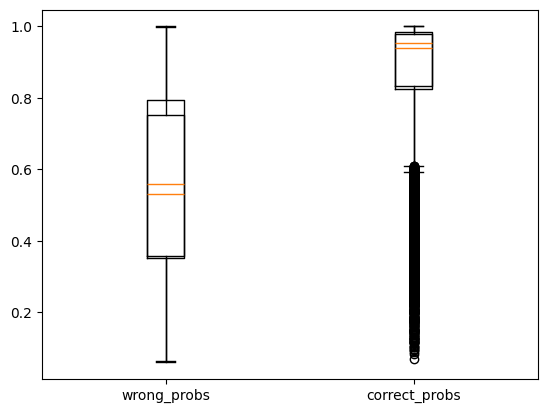

In [5]:
from util import *
from transformers import ViTImageProcessor, ViTForImageClassification
from datasets import load_from_disk
from ultralytics import YOLO
import timm


teacher = YOLO('runs/classify/train/weights/best.pt')
eff_state = torch.load('efficient_net.pt')
student = timm.create_model("hf_hub:timm/efficientnetv2_rw_m.agc_in1k", pretrained=True)
student = nn.Sequential(nn.UpsamplingNearest2d(size=(224,224)), student)


student.load_state_dict(eff_state['model'])

dataset = load_from_disk('./preprocessed_dataset')
test_dataset = load_from_disk('./preprocessed_test_dataset')


kwargs = {
    'teacher': teacher,
    'student': student,
    'dataset': dataset,
    'test_dataset': test_dataset,
    'lr' : 0.0001,
    'batch_size' : 32,
    'print_iter_num' : 30,
    'epochs' : 30,
    'save_path' : 'YOLO_eff_ensemble.pt',
    'load_path' : None,
}

train_coteaching(**kwargs)

In [2]:
import torch

eff_state = torch.load('efficient_net.pt')

keys = list(eff_state['model'].keys())
for i in keys:
    eff_state['model']['1.'+i] = eff_state['model'].pop(i)

In [3]:
torch.save(eff_state, 'efficient_net.pt')